step 1:  Data Ingestion

In [237]:
import pandas as pd
import numpy as np

In [238]:
from sklearn.datasets import make_regression

In [239]:
data = make_regression(n_samples=10000,n_features=1,n_informative=1,noise=13)

In [240]:
data

(array([[ 1.14232882],
        [-1.32643748],
        [ 0.72437901],
        ...,
        [ 1.03187245],
        [-1.57304744],
        [-1.29260532]]),
 array([  82.05612701, -112.50106065,   76.08638169, ...,   80.65258612,
        -128.45025085,  -84.5708032 ]))

In [241]:
df=pd.DataFrame(data[0],columns=['x'])
df.head()

,x
0,1.142329
1,-1.326437
2,0.724379
3,0.016317
4,0.337863


In [242]:
df['y']=data[1]
df.head()

,x,y
0,1.142329,82.056127
1,-1.326437,-112.501061
2,0.724379,76.086382
3,0.016317,10.487806
4,0.337863,19.080368


In [243]:
df

,x,y
0,1.142329,82.056127
1,-1.326437,-112.501061
2,0.724379,76.086382
3,0.016317,10.487806
4,0.337863,19.080368
...,...,...
9995,-1.116117,-102.850171
9996,-1.012753,-48.927856
9997,1.031872,80.652586
9998,-1.573047,-128.450251


In [244]:
from matplotlib import pyplot as plt

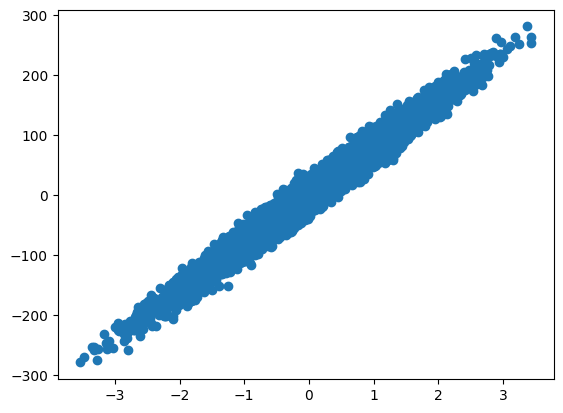

In [245]:
plt.scatter(df['x'],df['y'])
plt.show()

In [246]:
df.shape

(10000, 2)

Step 2 : Data preprocessing

In [247]:
df.describe()

,x,y
count,10000.000000,10000.000000
mean,-0.002375,-0.129221
std,0.991311,80.372466
min,-3.536868,-279.514502
25%,-0.675662,-54.755350
50%,0.000251,-0.056471
75%,0.670864,54.316271
max,3.437968,281.407862


Step 3 : Splitting of data into train test

In [248]:
x=df['x']
y=df['y']

In [249]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,train_size=0.8)

In [250]:
x_train.shape,y_train.shape

((8000,), (8000,))

In [251]:
x_test.shape,y_test.shape

((2000,), (2000,))

In [252]:
x_train=np.array(x_train).reshape((-1,1))
y_train=np.array(y_train).reshape((-1,1))
x_test=np.array(x_test).reshape((-1,1))
y_test=np.array(y_test).reshape((-1,1))

In [253]:
x_train.shape,y_train.shape

((8000, 1), (8000, 1))

In [254]:
x_test.shape,y_test.shape

((2000, 1), (2000, 1))

Step $ : Model Building

In [255]:
from sklearn.linear_model import LinearRegression

In [256]:
model=LinearRegression()

In [257]:
model.fit(x_train,y_train)

LinearRegression()

In [258]:
type(x_test)

numpy.ndarray

In [259]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [260]:
model.coef_

array([[79.96794762]])

In [261]:
model.intercept_

array([0.04766313])

5 : Model Evalution

In [262]:
from sklearn.metrics import r2_score as r2
#calculating adjacted score
def adj_r2(act,pred):
    return 1- ((1-r2(act,pred))*(act.shape[0]-1))/(act.shape[0]-1-1)


print("Adj. R2 score :",adj_r2(y_train,y_train_pred))

Adj. R2 score : 0.9730296128907434


In [263]:
print("Adj. R2 score :",adj_r2(y_test,y_test_pred))

Adj. R2 score : 0.975348339045622


Saving the model

In [264]:
import pickle

In [266]:
with open("model.pkl",'wb') as file:
    pickle.dump(model,file)
    file.close()

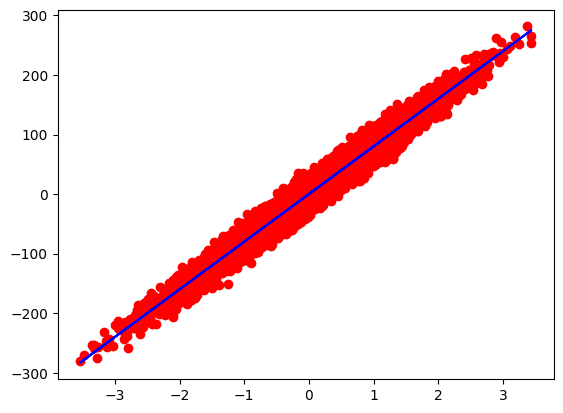

In [267]:
plt.scatter(x_train,y_train,c='r')
plt.scatter(x_test,y_test,c='r')
plt.plot(x_train,y_train_pred,c='b')
plt.plot(x_test,y_test_pred,c='b')

plt.show()